# The curse of dimensionality


Here is a function that depends on time $t$ and 3 other parameters. 

In this example class we generate many samples of the function and 
then try to build an interpolator that approximates this function as accurately as possible.

You can think of this function as a time series that depends on paramaters $a,b,c$.

In this problem class, we will assume the ranges of the parameters are:

- $0<a<1$

- $-0.5<b<0.5$

- $5<c<10$


When not varied we will fix the values to $a=0.1$, $b=-0.13$, $c=9$.


We will always assume time $t$ is between 0 and 1. Our time grid is `t = np.linspace(0, 1, 100)`, unless otherwise requested.


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.interpolate import griddata
from pyDOE import *
from ipywidgets import interactive
import ipywidgets as widgets
from memory_profiler import memory_usage
import timeit

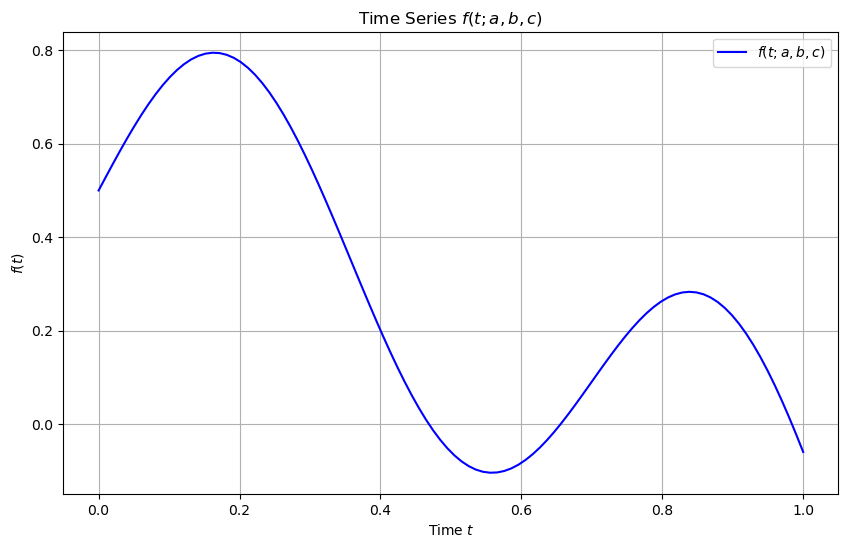

In [2]:
def f(t, a, b, c):
    return np.sqrt(a) * np.exp(-b * t) * np.sin(c * t) + 0.5 * np.cos(2 * t)

# Example usage
# Define parameters
a = 0.1
b = -0.13
c = 9


# Define time range
t = np.linspace(0, 1, 100)  # time from 0 to 1 with 100 points

# Calculate f(t) for these parameters
f_values = f(t, a, b, c)

# Plot the function
plt.figure(figsize=(10, 6))
plt.plot(t, f_values, label=r'$f(t; a, b, c)$', color='blue')
plt.xlabel('Time $t$')
plt.ylabel(r'$f(t)$')
plt.title(r'Time Series $f(t; a, b, c)$')
plt.legend()
plt.grid(True)
plt.show()


You can make a widget plot and play with different parameter values.  

In [3]:
def plot_with_parameters(a, b, c):
    # Define time range
    t = np.linspace(0, 1, 100)
    
    # Calculate f(t) for these parameters 
    f_values = f(t, a, b, c)
    
    # Plot the function
    plt.figure(figsize=(10, 6))
    plt.plot(t, f_values, label=r'$f(t; a, b, c)$', color='blue')
    plt.xlabel('Time $t$')
    plt.ylabel(r'$f(t)$')
    plt.title(r'Time Series $f(t; a, b, c)$')
    plt.legend()
    plt.grid(True)
    plt.show()

# Create interactive widget
interactive_plot = interactive(
    plot_with_parameters,
    a=widgets.FloatSlider(min=0, max=1, step=0.01, value=0.1),
    b=widgets.FloatSlider(min=-0.5, max=0.5, step=0.01, value=-0.13),
    c=widgets.FloatSlider(min=5, max=10, step=0.1, value=9)
)

display(interactive_plot)

interactive(children=(FloatSlider(value=0.1, description='a', max=1.0, step=0.01), FloatSlider(value=-0.13, de…

The goal of this problem class is to sample this function across all its parameter space and create interpolators. 

You should aim to understand the limitations of interpolation and how to deal with this very important problem. 

## Question 1

Consider all parameter values (except $t$) are fixed and create an interpolator with respect to time $t$. 

You use the original grid for the interpolation. 

In [4]:
t = np.linspace(0, 1, 100)

### Question 1 Answer

In [5]:
# Define function
def f(t, a, b, c):
    return np.sqrt(a) * np.exp(-b * t) * np.sin(c * t) + 0.5 * np.cos(2 * t)

# Define parameters
a = 0.1
b = -0.13
c = 9

# Calculate f(t) for these parameters
f_values = f(t, a, b, c)

# Def an interpolating function
g = interp1d(t, f_values, kind='linear')

## Question 2

Evaluate the interpolator on a much finer grid than the original $t$ grid. 

In [6]:
# Finer time grid for evaluation
t_fine = np.linspace(0, 1, 1000)
f_interp = g(t_fine)
f_exact=f(t_fine, a, b, c)

## Question 3

Show the results of question 2 in a plot, showing both the exact function and the predictions of the interpolator. 

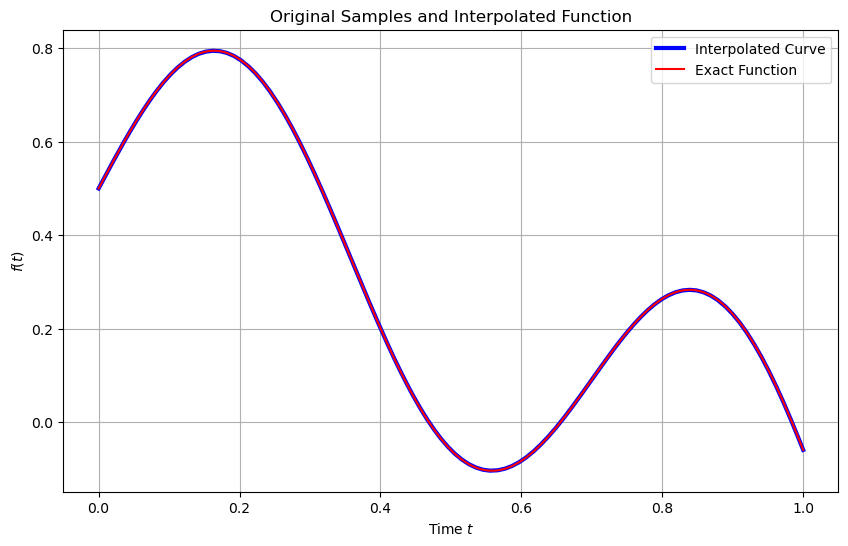

In [7]:
# Plot the original samples and the interpolated function
plt.figure(figsize=(10, 6))
#plt.plot(t, f_values, 'o', label='Original Samples', color='black', markersize=5)
plt.plot(t_fine, f_interp, '-', label='Interpolated Curve', color='blue', linewidth=3)
plt.plot(t_fine, f_exact, '-', label='Exact Function', color='red', linewidth=1.5)
plt.xlabel('Time $t$')
plt.ylabel(r'$f(t)$')
plt.title('Original Samples and Interpolated Function')
plt.legend()
plt.grid(True)
plt.show()

## Question 4

Show the ratio of the interpolated values to true values accross the fine time grid. 

What do you observe? Does it make sense?


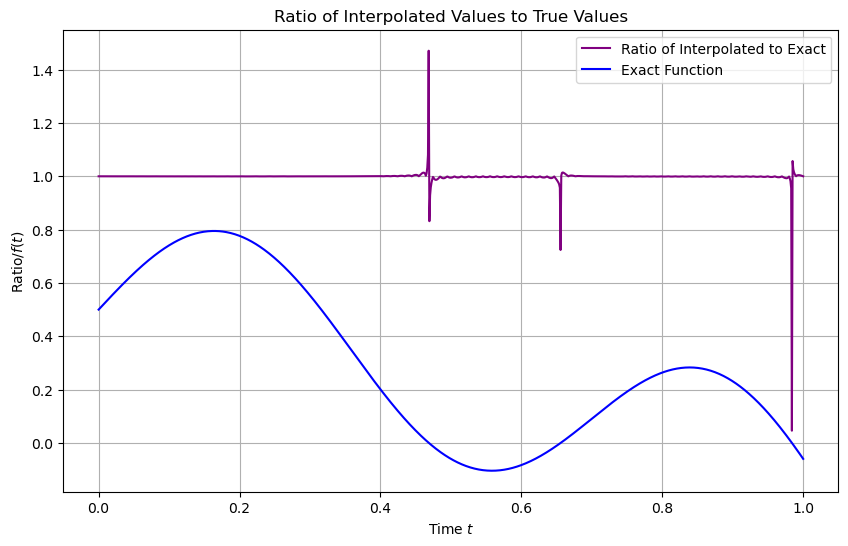

In [8]:
ratio = f_interp / f_exact

plt.figure(figsize=(10, 6))
plt.plot(t_fine, ratio, label='Ratio of Interpolated to Exact', color='purple')
plt.plot(t_fine, f_exact, '-', label='Exact Function', color='blue', linewidth=1.5)
plt.xlabel('Time $t$')
plt.ylabel('Ratio/'r'$f(t)$')
plt.title('Ratio of Interpolated Values to True Values')
plt.legend()
plt.grid(True)
plt.show()

## Question 5

Consider now all paramaters fixed except $a$ (and $t$). 

We assume the parameter $a$ can take values between 0 and 1.

Generate 10 samples of $f$ (i.e., 10 time series)  corresponding to linearly spaced values of $a$ spanning the interval.

Store them in a `pandas` DataFrame and plot them with the `plot` method of the DataFrame. 


In [9]:
# Define function
def f(t, a, b, c):
    return np.sqrt(a) * np.exp(-b * t) * np.sin(c * t) + 0.5 * np.cos(2 * t)

# Define parameters
a = np.linspace(0,1,10)
b = -0.13
c = 9
t = np.linspace(0, 1, 100)

# Create an empty DataFrame to store the time series data
df = pd.DataFrame(index=t)

# Compute and store the time series for each a value
for i in a:
    f_values = f(t, i, b, c)
    df[f'a={i:.2f}'] = f_values 

print(df)

            a=0.00    a=0.11    a=0.22    a=0.33    a=0.44    a=0.56  \
0.000000  0.500000  0.500000  0.500000  0.500000  0.500000  0.500000   
0.010101  0.499898  0.530199  0.542750  0.552381  0.560500  0.567653   
0.020202  0.499592  0.560023  0.585055  0.604262  0.620454  0.634720   
0.030303  0.499082  0.589223  0.626560  0.655210  0.679363  0.700643   
0.040404  0.498368  0.617551  0.666918  0.704799  0.736734  0.764869   
...            ...       ...       ...       ...       ...       ...   
0.959596 -0.170695  0.097127  0.208063  0.293187  0.364950  0.428174   
0.969697 -0.180154  0.062714  0.163313  0.240505  0.305581  0.362914   
0.979798 -0.189539  0.026299  0.115702  0.184303  0.242137  0.293089   
0.989899 -0.198847 -0.011895  0.065544  0.124964  0.175058  0.219191   
1.000000 -0.208073 -0.051629  0.013172  0.062896  0.104815  0.141746   

            a=0.67    a=0.78    a=0.89    a=1.00  
0.000000  0.500000  0.500000  0.500000  0.500000  
0.010101  0.574120  0.580067  0.5

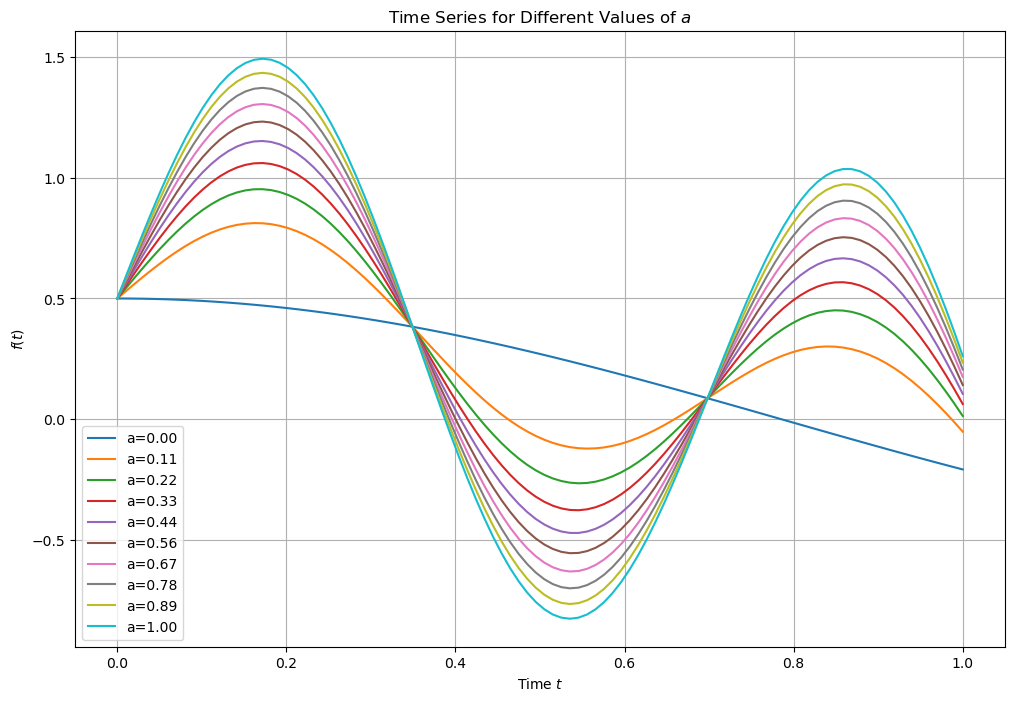

In [10]:
# Plotting
plt.figure(figsize=(12, 8))
for column in df.columns:
    plt.plot(t, df[column], label=column)
plt.xlabel('Time $t$')
plt.ylabel(r'$f(t)$')
plt.title('Time Series for Different Values of $a$')
plt.legend()
plt.grid(True)
plt.show()

## Question 6 

Create an interpolator that interpolates over $a$ (same range as previous question) and returns the full time series (i.e., values of $f$ for all time points) over the original time grid, i.e., $t$. 

In [11]:
t = np.linspace(0, 1, 100)

In [12]:
# Def an interpolating function
g = interp1d(a, df.values, kind='linear', axis=1) # Axis = 1 means the interpolation is conducted over columns of the df (ie. for each value of a)

Plot the result for $a=0.125$, like in  question 3.

Plot the ratio, like in question 4. 

[ 0.5         0.53176793  0.56315206  0.5938899   0.62372205  0.65239429
  0.67965974  0.70528091  0.72903168  0.75069923  0.77008581  0.78701046
  0.80131051  0.81284302  0.82148599  0.82713947  0.8297264   0.82919338
  0.82551113  0.81867483  0.80870424  0.79564359  0.77956133  0.76054959
  0.73872354  0.71422047  0.68719878  0.65783668  0.62633083  0.59289475
  0.55775715  0.52116004  0.48335683  0.44461028  0.40519033  0.36537196
  0.32543289  0.28565136  0.24630384  0.20766273  0.16999417  0.1335558
  0.09859463  0.06534505  0.0340268   0.0048432  -0.02202058 -0.04639905
 -0.06814784 -0.08714487 -0.10329141 -0.11651297 -0.12675989 -0.13400783
 -0.13825799 -0.13953717 -0.13789754 -0.13341628 -0.12619497 -0.11635879
 -0.10405551 -0.08945428 -0.07274429 -0.05413323 -0.03384554 -0.01212061
  0.01078918  0.03462059  0.05910168  0.08395405  0.10889517  0.13364076
  0.15790712  0.18141357  0.20388477  0.22505303  0.24466063  0.26246197
  0.27822568  0.2917366   0.30279763  0.31123145  0.

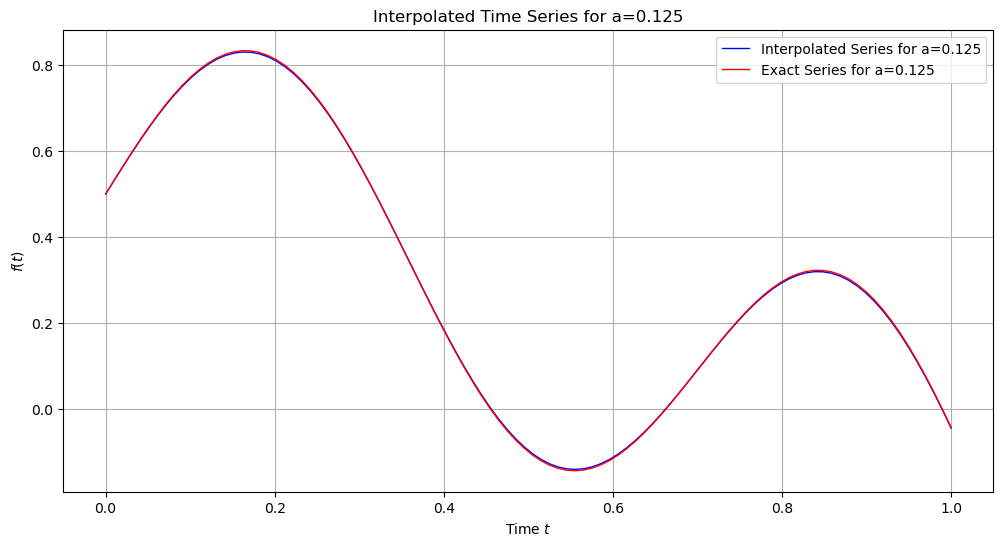

In [13]:
a_test = 0.125
f_exact = f(t, 0.125, b, c)
f_interp = g(a_test)

print(f_interp)
print(f_exact)

plt.figure(figsize=(12, 6))
plt.plot(t, f_interp, label=f'Interpolated Series for a={a_test:.3f}',color='blue', linewidth=1)
plt.plot(t, f_exact, label=f'Exact Series for a={a_test:.3f}', color='red', linewidth=1)
plt.xlabel('Time $t$')
plt.ylabel(r'$f(t)$')
plt.title(f'Interpolated Time Series for a={a_test:.3f}')
plt.legend()
plt.grid(True)
plt.show()


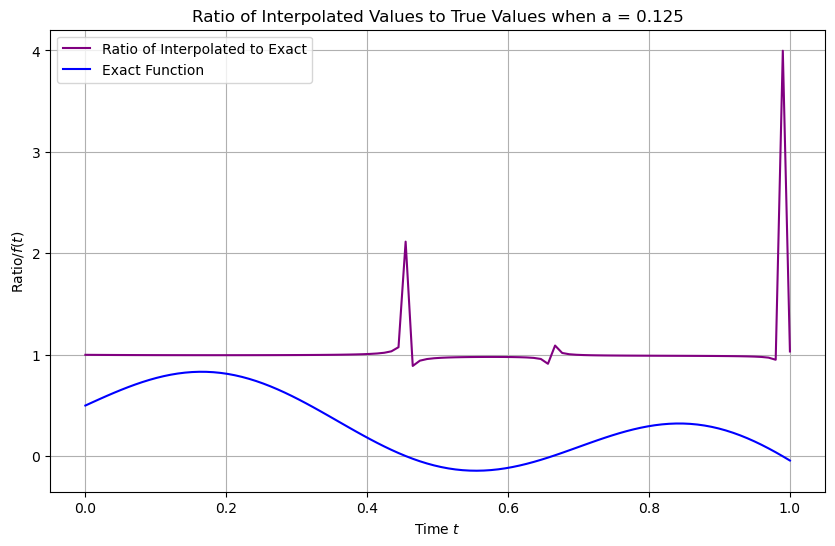

In [14]:
ratio = f_interp / f_exact

plt.figure(figsize=(10, 6))
plt.plot(t, ratio, label='Ratio of Interpolated to Exact', color='purple')
plt.plot(t, f_exact, '-', label='Exact Function', color='blue', linewidth=1.5)
plt.xlabel('Time $t$')
plt.ylabel('Ratio/'r'$f(t)$')
plt.title(f'Ratio of Interpolated Values to True Values when a = {a_test}')
plt.legend()
plt.grid(True)
plt.show()

## Question 7

Use `widgets` from `ipywidgets` to create a sliding scale of `a` values. 

In this question, you should plot the ratio between the interpolated values and the true values of the function evaluated at the original time grid $t$. 




In [ ]:
# Define function
def f(t, a, b, c):
    return np.sqrt(a) * np.exp(-b * t) * np.sin(c * t) + 0.5 * np.cos(2 * t)

# Define interactive plotting function
def inter_plot(a_test):
    a = np.linspace(0,1,10)
    t = np.linspace(0,1,100)
    b = -0.13
    c = 9

    # Create an empty DataFrame to store the time series data
    df = pd.DataFrame(index=t)

    # Compute and store the time series for each a value
    for i in a:
        f_values = f(t, i, b, c)
        df[f'a={i:.2f}'] = f_values 

    # Def an interpolating function
    g = interp1d(a, df.values, kind='linear', axis=1)
    
    f_exact = f(t, a_test, b, c)
    f_interp = g(a_test)

    ratio = f_interp / f_exact

    plt.figure(figsize=(10, 6))
    plt.plot(t, ratio, label='Ratio of Interpolated to Exact', color='purple')
    plt.plot(t, f_exact, '-', label='Exact Function', color='blue', linewidth=1.5)
    plt.xlabel('Time $t$')
    plt.ylabel('Ratio/'r'$f(t)$')
    plt.title('Ratio of Interpolated Values to True Values')
    plt.legend()
    plt.grid(True)
    plt.show()

interactive_plott = interactive(
    inter_plot,
    a_test=widgets.FloatSlider(min=0, max=1, step=0.01, value=0.1)
)

display(interactive_plott)

## Question 8

From your results of Question 7, what do you observe? Does it make sense?


## Question 9 

We will now consider both $a$ and $b$ as interpolation parameters. 


Our interpolator should therefore interpolate accross both $a$ and $b$ ranges. 

Generate $10^2$ parameter value pairs $(a,b)$ in the range $0<a<1$ and $-0.5<b<0.5$ using [latin hyper cube](https://pythonhosted.org/pyDOE/randomized.html) sampling. 


Show the $a$ and $b$ samples as a 2D scatter plot. 


In [ ]:
# Obtaining 10 random values of a and b which are seeded and comply with range
np.random.seed(5)

N=10
a=lhs(1,samples=N).flatten()
#print(a)

b = np.interp(lhs(1,samples=N).flatten(), (0, 1), (-0.5, 0.5)) # To comply with range of b
#print(b)

# Defining a grid to print A and B
A, B = np.meshgrid(a, b)
#print("A.shape, B.shape:", A.shape, B.shape)

# Flatten the meshgrid arrays to use them as coordinates for the scatter plot
A_flat = A.flatten()
B_flat = B.flatten()

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(A_flat, B_flat, color='blue', marker='o')
plt.xlabel('Parameter $a$')
plt.ylabel('Parameter $b$')
plt.title('Scatter Plot of $(a, b)$ Values')
plt.grid(True)
plt.show()

## Question 10

For comparison, on the same plot, add a uniformly sampled realization of $10^2$ $a$ and $b$ values.


In [ ]:
aa = np.linspace(0,1,10)
#print(a)

bb = np.linspace(-0.5,0.5,10)
#print(b)

# Defining a grid to print A and B
AA, BB = np.meshgrid(aa, bb)
#print("A.shape, B.shape:", A.shape, B.shape)

# Flatten the meshgrid arrays to use them as coordinates for the scatter plot
AA_flat = AA.flatten()
BB_flat = BB.flatten()

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(A_flat, B_flat, label='LHS Sample', color='blue', marker='o')
plt.scatter(AA_flat, BB_flat, label='Uniformly Spaced', color='red', marker='x')
plt.xlabel('Parameter $a$')
plt.ylabel('Parameter $b$')
plt.legend()
plt.title('Scatter Plot of $(a, b)$ Values')
plt.grid(True)
plt.show()

Can you distinguish by eye? 

As an extension question, think of how you would proceed if 
you needed to prove that these samples come from different generative processes (uniform or Latin Hyper Cube). 

## Question 11


Create the interpolator over the parameter space $(a,b)$, interpolating over samples of the function evaluated at the original time grid $t$.

As you will realise, we are dealing with an irregular grid and need the `griddata` method ([doc](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.griddata.html)).  

In [20]:
# Define function
def f(t, a, b, c):
    return np.sqrt(a) * np.exp(-b * t) * np.sin(c * t) + 0.5 * np.cos(2 * t)

# Defining parameters
c = 9
t = np.linspace(0, 1, 100)

# Irregularly spaced data points
# Obtaining 10 random values of a and b which are seeded and comply with range
np.random.seed(5)
N = 10
a_sample = lhs(1, samples=N).flatten()
b_sample = np.interp(lhs(1, samples=N).flatten(), (0, 1), (-0.5, 0.5))
#print(a_sample, b_sample)

# Create an array to store the time series data
f_sample = np.array([f(i, a_sample, b_sample, c) for i in t]) # Creates a time series of f values for every (a_sample, b_sample)
print(f_sample)
print(f_sample.shape)

[[ 5.00000000e-01  5.00000000e-01  5.00000000e-01  5.00000000e-01
   5.00000000e-01  5.00000000e-01  5.00000000e-01  5.00000000e-01
   5.00000000e-01  5.00000000e-01]
 [ 5.87339292e-01  5.82529012e-01  5.42500700e-01  5.39080862e-01
   5.74865722e-01  5.60422988e-01  5.56849575e-01  5.13372084e-01
   5.78733108e-01  5.67940535e-01]
 [ 6.74598144e-01  6.64049958e-01  5.84358627e-01  5.77469263e-01
   6.49494774e-01  6.19554971e-01  6.13268195e-01  5.26325346e-01
   6.56845451e-01  6.35184651e-01]
 [ 7.61049130e-01  7.43888815e-01  6.25226891e-01  6.14848322e-01
   7.23264566e-01  6.76916734e-01  6.68785268e-01  5.38752285e-01
   7.33687126e-01  7.01173780e-01]
 [ 8.45962847e-01  8.21384840e-01  6.64765886e-01  6.50909223e-01
   7.95553134e-01  7.32046710e-01  7.22934039e-01  5.50548968e-01
   8.08615201e-01  7.65357553e-01]
 [ 9.28613975e-01  8.95896002e-01  7.02646066e-01  6.85353724e-01
   8.65744309e-01  7.84504620e-01  7.75255475e-01  5.61615865e-01
   8.80999052e-01  8.27198352e-01

In [ ]:
# Define a regular grid over which to interpolate
ai = np.linspace(0, 1, 50)
bi = np.linspace(-0.5, 0.5, 50)
a_grid, b_grid = np.meshgrid(ai, bi)

# Create an empty DataFrame to store the interpolated data
interp_df = pd.DataFrame(index=pd.MultiIndex.from_product([ai, bi], names=['a', 'b']))

# Interpolate the data for each time step
for i, j in enumerate(t):
    f_value = f_sample[i, :]  # Get values at this time step for all (a, b)
    f_interp = griddata(
        points = np.column_stack((a_sample, b_sample)), 
        values = f_value, 
        xi = (a_grid, b_grid), 
        method='cubic'
    )
    interp_df[f't={j:.2f}'] = f_interp.flatten()

print(interp_df)

## Question 12 

Show results with a sliding scale plot for $a$ and $b$.

On a different sliding bar plot, show the ratio between the interpolated values and the true values of the function evaluated at the original time grid $t$. 

In [ ]:
def interp_plot(a, b):
    # Find the closest grid points for 'a' and 'b'
    a_idx = (np.abs(ai - a)).argmin()
    b_idx = (np.abs(bi - b)).argmin()
    
    # Extract the interpolated function values at the selected a, b over time
    f_time = interp_df.iloc[(a_idx * len(bi)) + b_idx].values

    # Plot the interpolated function with time on the x-axis
    plt.figure(figsize=(8, 6))
    plt.plot(t, f_time, label=f"f(a={a:.2f}, b={b:.2f}, t)", color="blue")
    plt.xlabel("Time (t)")
    plt.ylabel("Interpolated f(a, b, t)")
    plt.title(f"Evolution of f(a, b, t) over time (a={a:.2f}, b={b:.2f})")
    plt.legend()
    plt.grid()
    plt.show()

# Create interactive widget
interactive_plot = interactive(
    interp_plot,
    a=widgets.FloatSlider(min=0, max=1, step=0.01, value=0.1),
    b=widgets.FloatSlider(min=-0.5, max=0.5, step=0.01, value=-0.13),
)

display(interactive_plot)

In [ ]:
# Function to plot the interpolated data for a specific time step
def plot_interpolated_values(t=0.5):
    col_name = f't={t:.2f}'  # Construct the column name for the selected time step
    
    if col_name in interp_df.columns:
        # Extract and reshape the data for the current time step
        f_interp = interp_df[col_name].values.reshape(len(ai), len(bi))
        
        # Plot the data
        plt.figure(figsize=(8, 6))
        plt.pcolormesh(ai, bi, f_interp, shading='auto', cmap='viridis')
        plt.colorbar(label='Interpolated Values')
        plt.title(f"Interpolated Values at Time t={t:.2f}")
        plt.xlabel('a')
        plt.ylabel('b')
        
        # Optionally, overlay the original sample points for reference
        plt.scatter(a_sample, b_sample, c='red', edgecolor='k', label='Sample Points', marker='o')
        plt.legend()
        plt.show()
    else:
        print(f"No data available for time t={t:.2f}")

# Create an interactive widget for choosing the time step to plot
interactive_plot = interactive(
    plot_interpolated_values,
    t=widgets.FloatSlider(min=0, max=1, step=0.01, value=0.1)
)

display(interactive_plot)

What do you observe? 

Does it make sense? 

## Question 13

Compare memory and time of (i) the original function call and (ii) the interpolator call. 

Comment. 

In [ ]:
# Define function
def f(t, a, b, c):
    return np.sqrt(a) * np.exp(-b * t) * np.sin(c * t) + 0.5 * np.cos(2 * t)

# Defining parameters
c = 9
t = np.linspace(0, 1, 100)

# Irregularly spaced data points
# Obtaining 10 random values of a and b which are seeded and comply with range
np.random.seed(5)
N = 10
a_sample = lhs(1, samples=N).flatten()
b_sample = np.interp(lhs(1, samples=N).flatten(), (0, 1), (-0.5, 0.5))
#print(a_sample, b_sample)

# Create an empty DataFrame to store the time series data
f_sample = np.array([f(i, a_sample, b_sample, c) for i in t]) # Creates a time series of f values for every (a_sample, b_sample)

# Define a regular grid over which to interpolate
ai = np.linspace(0, 1, 50)
bi = np.linspace(-0.5, 0.5, 50)
a_grid, b_grid = np.meshgrid(ai, bi)

# Create an array to store the interpolated data
interp_df = pd.DataFrame(index=pd.MultiIndex.from_product([ai, bi], names=['a', 'b']))

# Interpolate the data for each time step
for i, j in enumerate(t):
    f_value = f_sample[i, :]  # Get values at this time step for all (a, b)
    f_interp = griddata(
        points = np.column_stack((a_sample, b_sample)), 
        values = f_value, 
        xi = (a_grid, b_grid), 
        method='cubic'
    )
    interp_df[f't={j:.2f}'] = f_interp.flatten()

In [26]:
# Generate values using the original function
def exact_function():
    # Define a regular grid over which to interpolate
    ai = np.linspace(0, 1, 50)
    bi = np.linspace(-0.5, 0.5, 50)
    a_grid, b_grid = np.meshgrid(ai, bi)

    f_values = np.array([f(t, a, b, c) for a, b in zip(a_sample, b_sample)])
    return f_values

# Generate values using the interpolator
def interpolator(a_sample=a_sample, b_sample=b_sample, t=t):
    f_sample = np.array([f(i, a_sample, b_sample, c) for i in t]) # Creates a time series of f values for every (a_sample, b_sample)

    # Define a regular grid over which to interpolate
    ai = np.linspace(0, 1, 50)
    bi = np.linspace(-0.5, 0.5, 50)
    a_grid, b_grid = np.meshgrid(ai, bi)

    # Create an array to store the interpolated data
    interp_df = pd.DataFrame(index=pd.MultiIndex.from_product([ai, bi], names=['a', 'b']))

    # Interpolate the data for each time step
    for i, j in enumerate(t):
        f_value = f_sample[i, :]  # Get values at this time step for all (a, b)
        f_interp = griddata(
            points = np.column_stack((a_sample, b_sample)), 
            values = f_value, 
            xi = (a_grid, b_grid), 
            method='cubic'
        )
        interp_df[f't={j:.2f}'] = f_interp.flatten()
    
    return interp_df

# Measure time
time_original = timeit.timeit(original_function_call, number=1)
time_interpolator = timeit.timeit(interpolator_call, number=1)

# Measure memory
memory_original = max(memory_usage((original_function_call,)))
memory_interpolator = max(memory_usage((interpolator_call,)))

# Print results
print("Time Comparison:")
print(f"Original function call: {time_original:.6f} seconds")
print(f"Interpolator call: {time_interpolator:.6f} seconds")

print("\nMemory Usage Comparison:")
print(f"Original function call: {memory_original:.2f} MB")
print(f"Interpolator call: {memory_interpolator:.2f} MB")

Time Comparison:
Original function call: 0.000151 seconds
Interpolator call: 0.001487 seconds

Memory Usage Comparison:
Original function call: 149.05 MB
Interpolator call: 149.41 MB


## Question 14

Add a third parameter, $c$ to our interpolation problem and repeat questions 9 to 13. 

For this parameter, use a range of $5<c<10$. 

Comment on the results. 

## Question 15

Instead of interpolating with the griddata method, use (i) a gaussian process, and (ii) a neural network whose output layer is the function predicted at the $10^2$ points of the time grid and input layer is a,b,c values.  

What do you observe in terms of (i) time and (ii) memory? Comment on scalability in all cases covered. 


**Tips**: For the neural net part of this question use Google Colab and the GPUs there. Training should take a few minutes. A good idea for you to practice is also to use CSD3 to solve this question.
